## Problem Statement
##### This data was extracted from the census bureau database found at
##### http://www.census.gov/ftp/pub/DES/www/welcome.html
##### Donor: Ronny Kohavi and Barry Becker,
##### Data Mining and Visualization
##### Silicon Graphics.
##### e-mail: ronnyk@sgi.com for questions.
##### Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
##### 48842 instances, mix of continuous and discrete (train=32561, test=16281)
##### 45222 if instances with unknown values are removed (train=30162, test=15060)
##### Duplicate or conflicting instances : 6
##### Class probabilities for adult.all file
Probability for the label '>50K' : 23.93% / 24.78% (without unknowns)
Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
Extraction was done by Barry Becker from the 1994 Census database. A set of
reasonably clean records was extracted using the following conditions:
((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0)) Prediction task is to
determine whether a person makes over 50K a year. Conversion of original data as
follows:
1. Discretized a gross income into two ranges with threshold 50,000.
2. Convert U.S. to US to avoid periods.
3. Convert Unknown to "?"
4. Run MLC++ GenCVFiles to generate data,test.
Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian
noninstitutional population of the US. These are prepared monthly for us by Population
Division here at the Census Bureau. We use 3 sets of controls.
These are:
1. A single cell estimate of the population 16+ for each state.
2. Controls for Hispanic Origin by age and sex.
3. Controls by Race, age and sex.
We use all three sets of controls in our weighting program and "rake" through them 6
times so that by the end we come back to all the controls we used.
The term estimate refers to population totals derived from CPS by creating "weighted
tallies" of any specified socio-economic characteristics of the population. People with
similar demographic characteristics should have similar weights. There is one important
caveat to remember about this statement. That is that since the CPS sample is actually a
collection of 51 state samples, each with its own probability of selection, the statement
only applies within state.
Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
Problem 1:
Prediction task is to determine whether a person makes over 50K a year.
Problem 2:
Which factors are important
Problem 3:
Which algorithms are best for this dataset
NOTE: The solution shared through Github should contain the source code used and
the screenshot of the output.
3. Output
N/A

# Note: Prediction task is to determine whether a person makes over 50K a year.

# Conversion of original data as follows:
* 1. Discretized agrossincome into two ranges with threshold 50,000.
* 2. Convert U.S. to US to avoid periods.
* 3. Convert Unknown to "?"
* 4. Run MLC++ GenCVFiles to generate data,test.


# Description of fnlwgt (final weight)
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls.
*  These are:
*          1.  A single cell estimate of the population 16+ for each state.
*          2.  Controls for Hispanic Origin by age and sex.
*          3.  Controls by Race, age and sex.


> * We use all three sets of controls in our weighting program and "rake" through
> * them 6 times so that by the end we come back to all the controls we used.

> * The term estimate refers to population totals derived from CPS by creating
> * "weighted tallies" of any specified socio-economic characteristics of the
> * population.

> * People with similar demographic characteristics should have
* similar weights.  There is one important caveat to remember
* about this statement.  That is that since the CPS sample is
* actually a collection of 51 state samples, each with its own
* probability of selection, the statement only applies within
* state.


## Dataset Link
https://archive.ics.uci.edu/ml/machine-learning-databases/adult/
#### Problem 1:
Prediction task is to determine whether a person makes over 50K a year.
#### Problem 2:
Which factors are important
#### Problem 3:
Which algorithms are best for this dataset

# Importing the files and Data Reading

In [1]:
import numpy as np
import pandas as pd
train_set = pd.read_csv('adult_train.csv', header = None)
test_set = pd.read_csv('adult_test.csv', header = None)
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class']
train_set.columns = col_labels
test_set.columns = col_labels

In [2]:
# removing white spaces in the train dataset
train_set.replace('^\s+', '', regex=True, inplace=True) #front
train_set.replace('\s+$', '', regex=True, inplace=True) #end


# Replacing married and unmarried
train_set.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)
train_set.replace(['Private', 'Local-gov', 
              'Self-emp-not-inc', 'Federal-gov', 
              'State-gov','Self-emp-inc','Without-pay','Never-worked'],
             ['private','govt','self_employed','govt',
              'govt','self_employed','without_pay','without_pay'], inplace = True)
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,govt,77516,Bachelors,13.0,not married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,self_employed,83311,Bachelors,13.0,married,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,private,215646,HS-grad,9.0,not married,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,private,234721,11th,7.0,married,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,private,338409,Bachelors,13.0,married,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [3]:
# removing white spaces in the test dataset
test_set.replace('^\s+', '', regex=True, inplace=True) #front
test_set.replace('\s+$', '', regex=True, inplace=True) #end
# Replacing married and unmarried
test_set.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)
test_set.replace(['Private', 'Local-gov', 
              'Self-emp-not-inc', 'Federal-gov', 
              'State-gov','Self-emp-inc','Without-pay','Never-worked'],
             ['private','govt','self_employed','govt',
              'govt','self_employed','without_pay','without_pay'], inplace = True)
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,private,226802,11th,7,not married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,private,89814,HS-grad,9,married,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,govt,336951,Assoc-acdm,12,married,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,private,160323,Some-college,10,married,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497,Some-college,10,not married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [4]:
# defining function for estimating missing values in each columns
def missing_value(df):
    miss=[]
    col_list=df.columns
    for i in col_list:
        missing=df[i].isnull().sum()
        miss.append(missing)
        list_of_missing=pd.DataFrame(list(zip(col_list,miss)))
    return list_of_missing

In [5]:
print("Training Set ======================")
print(missing_value(train_set))

print("Test Set ======================")
print(missing_value(test_set))

Training Set ======================
                 0  1
0              age  0
1        workclass  0
2           fnlwgt  0
3        education  0
4    education_num  1
5   marital_status  1
6       occupation  1
7     relationship  1
8             race  1
9              sex  1
10    capital_gain  1
11    capital_loss  1
12  hours_per_week  1
13  native_country  1
14      wage_class  1
Test Set ======================
                 0  1
0              age  0
1        workclass  0
2           fnlwgt  0
3        education  0
4    education_num  0
5   marital_status  0
6       occupation  0
7     relationship  1
8             race  1
9              sex  1
10    capital_gain  1
11    capital_loss  1
12  hours_per_week  1
13  native_country  1
14      wage_class  1


<B>Don't See any null / missing value in the Train and Test Data Set</B>

In [6]:
# Checking the unique Values in the training dataset to check the correctness of data
print("Work Class ===", train_set.workclass.unique())
print("-"*100)
print("Age ===", train_set.age.unique())
print("-"*100)
print("fnlwgt ===", train_set.fnlwgt.unique())
print("-"*100)
print("education ===", train_set.education.unique())
print("-"*100)
print("education_num ===", train_set.education_num.unique())
print("-"*100)
print("marital_status ===", train_set.marital_status.unique())
print("-"*100)
print("occupation ===", train_set.occupation.unique())
print("-"*100)
print("relationship ===", train_set.relationship.unique())
print("-"*100)
print("race ===", train_set.race.unique())
print("-"*100)
print("sex ===", train_set.sex.unique())
print("-"*100)
print("capital_gain ===", train_set.capital_gain.unique())
print("-"*100)
print("capital_loss ===", train_set.capital_loss.unique())
print("-"*100)
print("hours_per_week ===", train_set.hours_per_week.unique())
print("-"*100)
print("native_country ===", train_set.native_country.unique())
print("-"*100)
print("wage_class ===", train_set.wage_class.unique())

Work Class === ['govt' 'self_employed' 'private' '?' 'without_pay']
----------------------------------------------------------------------------------------------------
Age === [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85]
----------------------------------------------------------------------------------------------------
fnlwgt === [ 77516  83311 215646 ... 115066 223751 354075]
----------------------------------------------------------------------------------------------------
education === ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']
----------------------------------------------------------------------------------------------------
education_num === [13.  9.  7. 14.  5. 10. 12. 11.  4. 16. 

##### By finding the uniques values we found    `"?" `   is suspicious in workclass, occupation and native_country

In [7]:
# Checking the unique Values in the test dataset to check the correctness of data
print("Work Class ===", test_set.workclass.unique())
print("-"*100)
print("Age ===", test_set.age.unique())
print("-"*100)
print("fnlwgt ===", test_set.fnlwgt.unique())
print("-"*100)
print("education ===", test_set.education.unique())
print("-"*100)
print("education_num ===", test_set.education_num.unique())
print("-"*100)
print("marital_status ===", test_set.marital_status.unique())
print("-"*100)
print("occupation ===", test_set.occupation.unique())
print("-"*100)
print("relationship ===", test_set.relationship.unique())
print("-"*100)
print("race ===", test_set.race.unique())
print("-"*100)
print("sex ===", test_set.sex.unique())
print("-"*100)
print("capital_gain ===", test_set.capital_gain.unique())
print("-"*100)
print("capital_loss ===", test_set.capital_loss.unique())
print("-"*100)
print("hours_per_week ===", test_set.hours_per_week.unique())
print("-"*100)
print("native_country ===", test_set.native_country.unique())
print("-"*100)
print("wage_class ===", test_set.wage_class.unique())

Work Class === ['private' 'govt' '?' 'self_employed' 'without_pay']
----------------------------------------------------------------------------------------------------
Age === [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89]
----------------------------------------------------------------------------------------------------
fnlwgt === [226802  89814 336951 ... 174525 161599 193494]
----------------------------------------------------------------------------------------------------
education === ['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
----------------------------------------------------------------------------------------------------
education_num === [ 7  9 12 10  6 15  4 13 14 16  3 11  5  

##### By finding the uniques values we found    `"?" `   is suspicious in workclass, occupation and native_country

In [8]:
# Column wise unwanted data calculation like "?" in train data set
col_names = train_set.columns
num_data = train_set.shape[0]
for c in col_names:
    num_non = train_set[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
988
5.58%


occupation
991
5.60%


native_country
321
1.81%




In [9]:
# Column wise unwanted data calculation like "?" in test data set
col_names = test_set.columns
num_data = test_set.shape[0]
for c in col_names:
    num_non = test_set[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
542
6.07%


occupation
543
6.08%


native_country
143
1.60%




In [10]:
# Replacing all the "?" data of training and test to np.nan

all_data = [train_set, test_set]
for data in all_data:
    for i in data.columns:
        data[i].replace('?', np.nan, inplace=True)
    #data.dropna(inplace=True)


In [11]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17703 entries, 0 to 17702
Data columns (total 15 columns):
age               17703 non-null int64
workclass         16715 non-null object
fnlwgt            17703 non-null int64
education         17703 non-null object
education_num     17702 non-null float64
marital_status    17702 non-null object
occupation        16711 non-null object
relationship      17702 non-null object
race              17702 non-null object
sex               17702 non-null object
capital_gain      17702 non-null float64
capital_loss      17702 non-null float64
hours_per_week    17702 non-null float64
native_country    17381 non-null object
wage_class        17702 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 2.0+ MB


In [12]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8933 entries, 0 to 8932
Data columns (total 15 columns):
age               8933 non-null int64
workclass         8391 non-null object
fnlwgt            8933 non-null int64
education         8933 non-null object
education_num     8933 non-null int64
marital_status    8933 non-null object
occupation        8390 non-null object
relationship      8932 non-null object
race              8932 non-null object
sex               8932 non-null object
capital_gain      8932 non-null float64
capital_loss      8932 non-null float64
hours_per_week    8932 non-null float64
native_country    8789 non-null object
wage_class        8932 non-null object
dtypes: float64(3), int64(3), object(9)
memory usage: 1.0+ MB


In [13]:
# Finding the persent of rows having atleast onw NAN valuel 
print('Train Dataset === ', train_set.isnull().T.any().T.sum()*100/train_set.shape[0], '%') # Train Dataset
print('Test Dataset === ', test_set.isnull().T.any().T.sum()*100/test_set.shape[0], '%') # 'Test dataset

Train Dataset ===  7.332090606111959 %
Test Dataset ===  7.556252098958916 %


## `7.4` Percent of rows are affected by  unusual character `"?"` in Training Set   
## `7.5` Percent of rows are affected by  unusual character `"?"` in Test Set   
## Deleting all such rows 

In [14]:
print("Training Set",train_set.shape)
print("Test Set",test_set.shape)

Training Set (17703, 15)
Test Set (8933, 15)


In [15]:
# Deleting NaN Rows in train dataset
train_set.dropna( axis=0, inplace = True)
# Deleting NaN Rows in test dataset
test_set.dropna( axis=0, inplace = True)

In [16]:
print("Training Set",train_set.shape)
print("Test Set",test_set.shape)

Training Set (16405, 15)
Test Set (8258, 15)


In [17]:
# Encode the categorical features as numbers for training set
import sklearn.preprocessing as preprocessing
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_train_set,encoders = number_encode_features(train_set)
#sns.heatmap(encoded_data.corr(), square=True)
#plt.show()
encoded_train_set.head()
#encoders

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,9,13.0,1,0,1,4,1,2174.0,0.0,40.0,37,0
1,50,2,83311,9,13.0,0,3,0,4,1,0.0,0.0,13.0,37,0
2,38,1,215646,11,9.0,1,5,1,4,1,0.0,0.0,40.0,37,0
3,53,1,234721,1,7.0,0,5,0,2,1,0.0,0.0,40.0,37,0
4,28,1,338409,9,13.0,0,9,5,2,0,0.0,0.0,40.0,4,0


In [18]:
# Encode the categorical features as numbers for test set
import sklearn.preprocessing as preprocessing
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_test_set,encoders = number_encode_features(test_set)
#sns.heatmap(encoded_data.corr(), square=True)
#plt.show()
encoded_test_set.head()
#encoders

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,1,226802,1,7,1,6,3,2,1,0.0,0.0,40.0,37,0
1,38,1,89814,11,9,0,4,0,4,1,0.0,0.0,50.0,37,0
2,28,0,336951,7,12,0,10,0,4,1,0.0,0.0,40.0,37,1
3,44,1,160323,15,10,0,6,0,2,1,7688.0,0.0,40.0,37,1
5,34,1,198693,0,6,1,7,1,4,1,0.0,0.0,30.0,37,0


# Feature Selection


In [19]:
encoded_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16405 entries, 0 to 17701
Data columns (total 15 columns):
age               16405 non-null int64
workclass         16405 non-null int64
fnlwgt            16405 non-null int64
education         16405 non-null int64
education_num     16405 non-null float64
marital_status    16405 non-null int64
occupation        16405 non-null int64
relationship      16405 non-null int64
race              16405 non-null int64
sex               16405 non-null int64
capital_gain      16405 non-null float64
capital_loss      16405 non-null float64
hours_per_week    16405 non-null float64
native_country    16405 non-null int64
wage_class        16405 non-null int64
dtypes: float64(4), int64(11)
memory usage: 2.0 MB


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

corr = encoded_train_set.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=0, cbar_kws={"shrink": .5},annot=True, fmt='.0%') # check for line width
#sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

In [21]:
encoded_train_set.shape

(16405, 15)

In [22]:
from scipy.stats import pointbiserialr, spearmanr

col_names = encoded_train_set.columns

param=[]
correlation=[]
abs_corr=[]

for c in col_names:
    #Check if binary or continuous
    if c != "wage_class":
        if len(encoded_train_set[c].unique()) <= 2:
            corr = spearmanr(encoded_train_set['wage_class'],encoded_train_set[c])[0]
        else:
            corr = pointbiserialr(encoded_train_set['wage_class'],encoded_train_set[c])[0]
        param.append(c)
        correlation.append(corr)
        abs_corr.append(abs(corr))

#Create dataframe for visualization
param_df=pd.DataFrame({'correlation':correlation,'parameter':param, 'abs_corr':abs_corr})

#Sort by absolute correlation
param_df=param_df.sort_values(by=['abs_corr'], ascending=False)

#Set parameter name as index
param_df=param_df.set_index('parameter')

param_df

,abs_corr,correlation
parameter,,
marital_status,0.434722,-0.434722
education_num,0.330977,0.330977
relationship,0.250934,-0.250934
age,0.235471,0.235471
hours_per_week,0.220868,0.220868
capital_gain,0.216951,0.216951
sex,0.215354,0.215354
capital_loss,0.153899,0.153899
race,0.076103,0.076103


In [23]:
best_features=param_df.index[0:5].values
print('Best features:\t',best_features)

Best features:	 ['marital_status' 'education_num' 'relationship' 'age' 'hours_per_week']


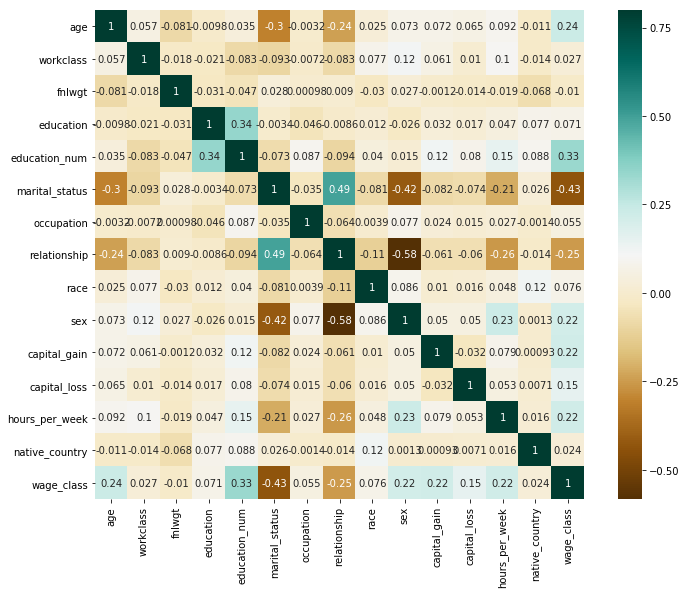

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
hmap = encoded_train_set.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(hmap, vmax=.8,annot=True,cmap="BrBG", square=True);

Inferences:

- Married citizens with spouse have higher chances of earning more than those who're unmarried/divorced/widowed/separated.
- Males on an average make earn more than females.
- Higher Education can lead to higher income in most cases.
- Asian-Pacific-Islanders and white are two races that have the highest average income.

## Function to Check how much space the data takes in memory

In [25]:
import math

# Displaying the size of the Dataframe in Memory
def convert_size(size_bytes):
    
    if size_bytes == 0:
        return "0B"
    size_name = ("Bytes", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    
    i = int(math.floor( math.log(size_bytes, 1024)) )
    
    p = math.pow(1024, i)
    
    s = round(size_bytes / p, 2)
    return "%s %s" % (s, size_name[i])

In [26]:
encoded_train_set.memory_usage().sum()

convert_size(encoded_train_set.memory_usage().sum())

'2.0 MB'

In [27]:
encoded_test_set.memory_usage().sum()

convert_size(encoded_test_set.memory_usage().sum())

'1.01 MB'

Total Data Size of Train and Test is 3.01 MB

(16405, 15)
5
3


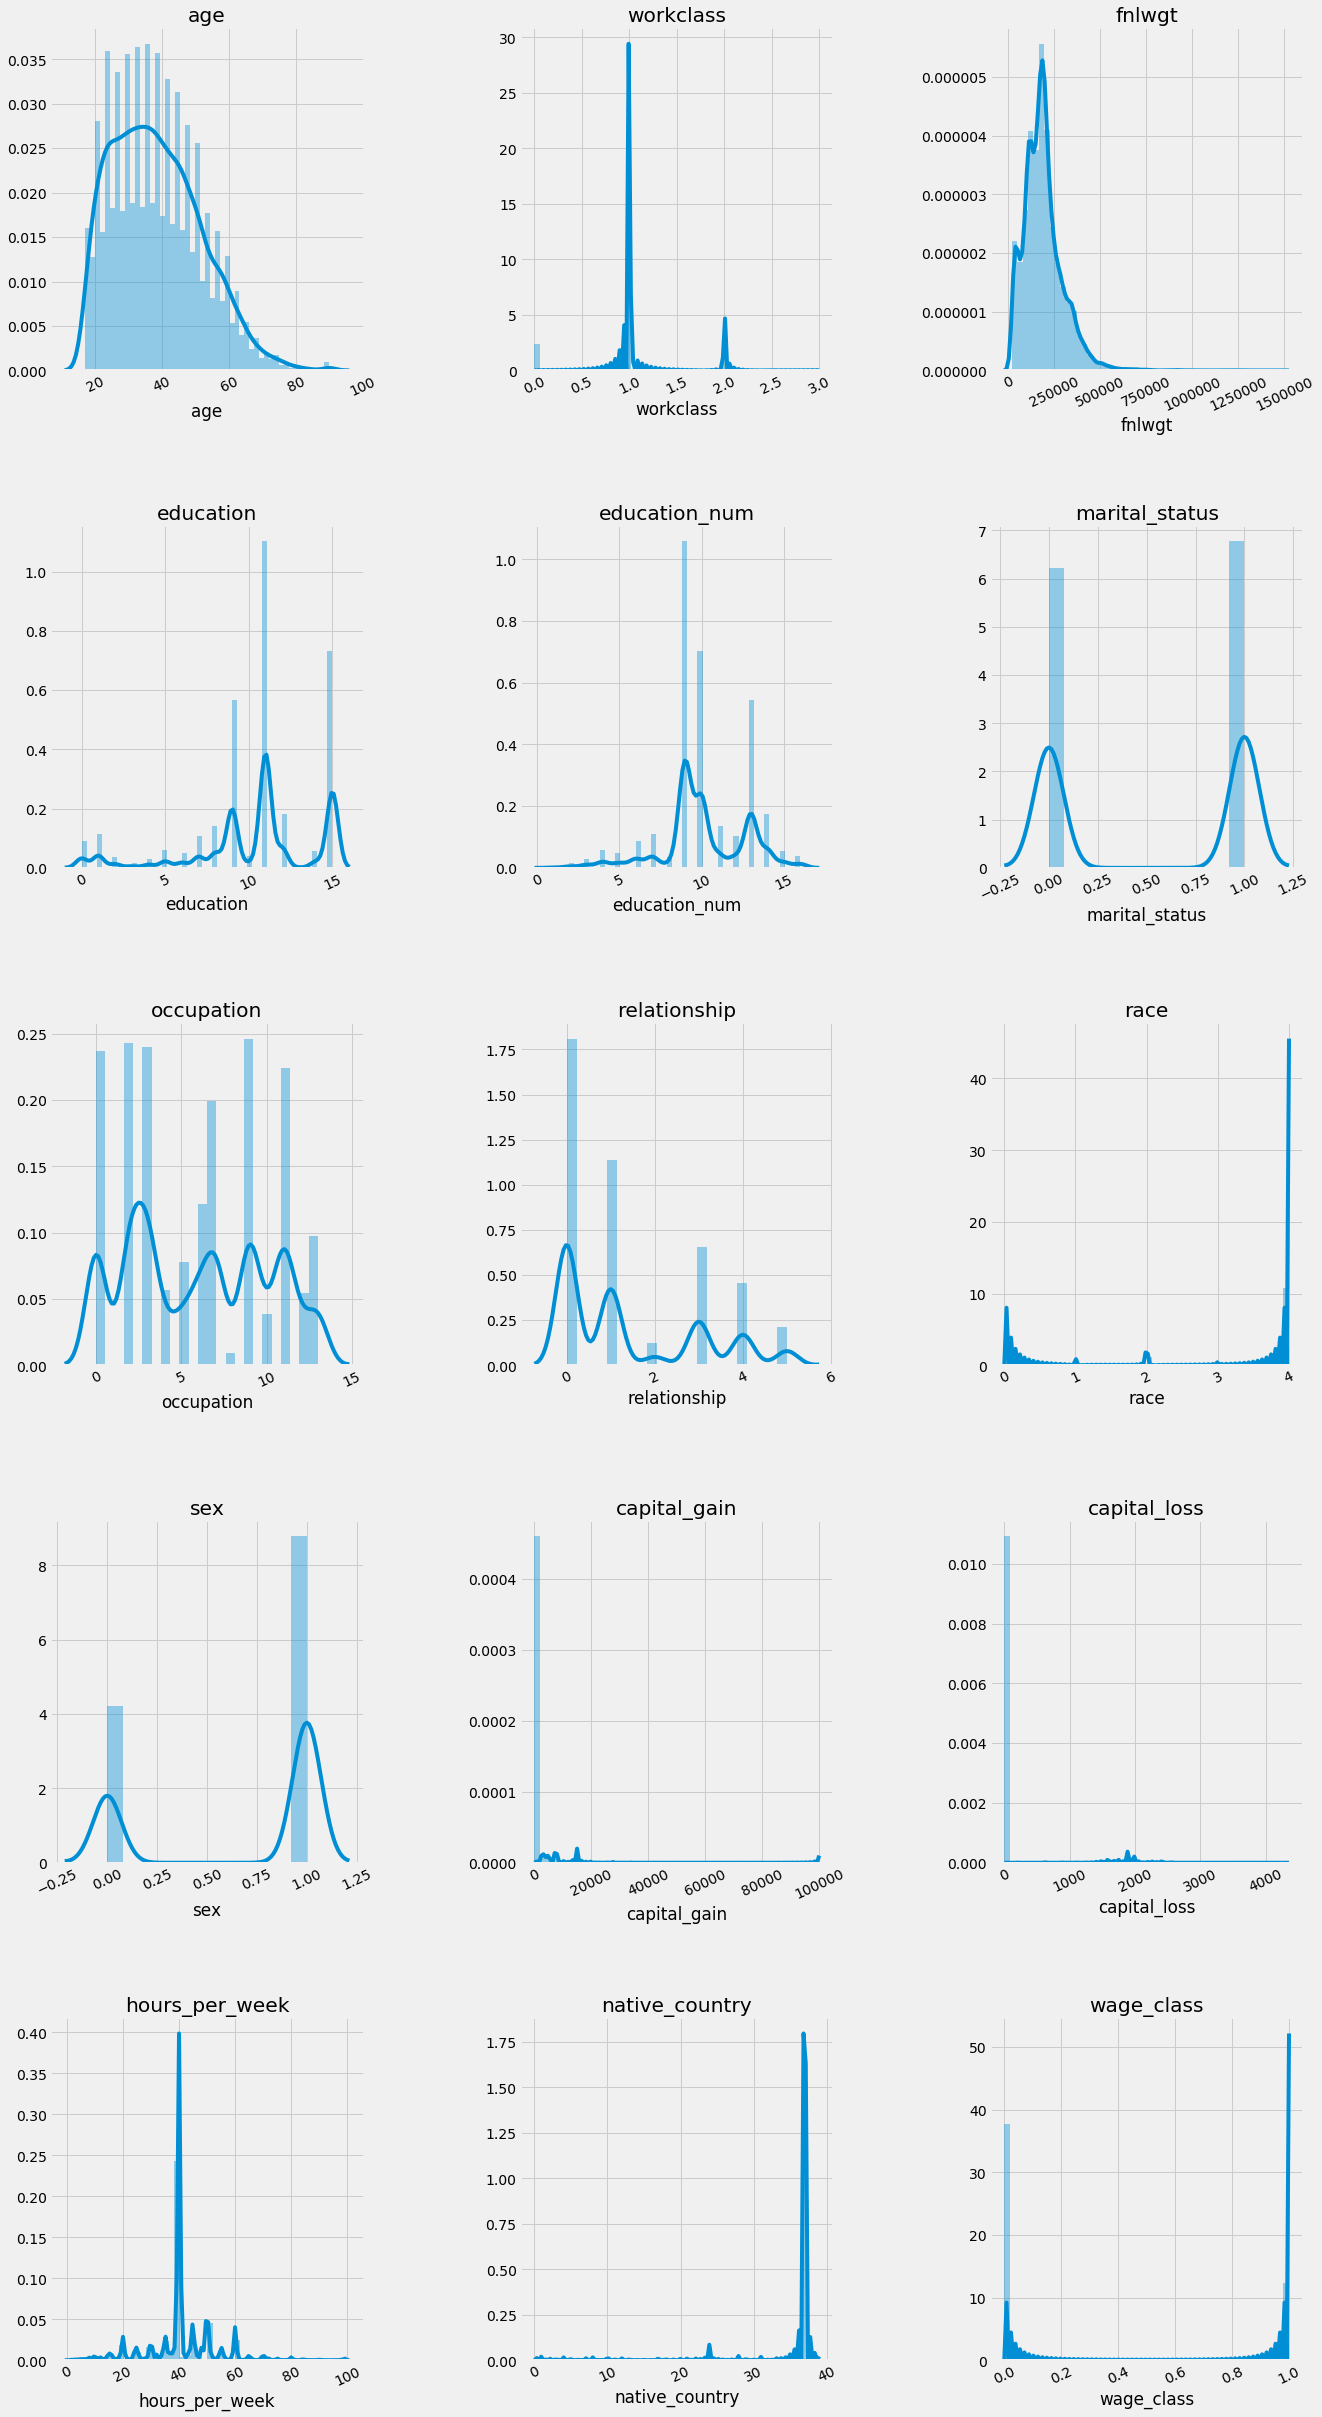

In [28]:
# Just setting more pictures of data
%matplotlib inline

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Let’s plot the distribution of each feature
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
                      
    plt.style.use('fivethirtyeight')
    fig = plt.figure(figsize=(width,height))                  
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    
    rows = math.ceil(float(dataset.shape[1]) / cols)
    
    print(dataset.shape)
    print(rows)
    print(cols)
    
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            #print(g)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
    
df = encoded_train_set
df1 = encoded_test_set
df.add(df1)
plot_distribution(df, cols=3, width=20, height=40, hspace=0.45, wspace=0.5)



### Applying Multiple algorithms on the data

In [29]:
encoded_train_set

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,0,77516,9,13.0,1,0,1,4,1,2174.0,0.0,40.0,37,0
1,50,2,83311,9,13.0,0,3,0,4,1,0.0,0.0,13.0,37,0
2,38,1,215646,11,9.0,1,5,1,4,1,0.0,0.0,40.0,37,0
3,53,1,234721,1,7.0,0,5,0,2,1,0.0,0.0,40.0,37,0
4,28,1,338409,9,13.0,0,9,5,2,0,0.0,0.0,40.0,4,0
5,37,1,284582,12,14.0,0,3,5,4,0,0.0,0.0,40.0,37,0
6,49,1,160187,6,5.0,0,7,1,2,0,0.0,0.0,16.0,21,0
7,52,2,209642,11,9.0,0,3,0,4,1,0.0,0.0,45.0,37,1
8,31,1,45781,12,14.0,1,9,1,4,0,14084.0,0.0,50.0,37,1
9,42,1,159449,9,13.0,0,3,0,4,1,5178.0,0.0,40.0,37,1


In [32]:
# Creating the test and train set
# No need to split as we have training and test dataset, 
from sklearn.model_selection import train_test_split


X_train = encoded_train_set.drop(['wage_class'],axis=1)
y_train = encoded_train_set['wage_class']

X_test = encoded_test_set.drop(['wage_class'],axis=1)
y_test = encoded_test_set['wage_class']

#Creation of Train and validation dataset
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,test_size=0.2,random_state=5)

### Let's select few algorithm used for classification

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [34]:
models = []
names = ['LR','Random Forest','Neural Network','GaussianNB','DecisionTreeClassifier','SVM','xgb']

models.append((LogisticRegression()))
models.append((RandomForestClassifier(n_estimators=100)))
models.append((MLPClassifier()))
models.append((GaussianNB()))
models.append((DecisionTreeClassifier()))
models.append((SVC()))
models.append((XGBClassifier()))

In [35]:
models

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
           penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
           verbose=0, warm_start=False),
 RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
             max_depth=None, max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
             oob_score=False, random_state=None, verbose=0,
             warm_start=False),
 MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
        beta_2=0.999, early_stopping=False, epsilon=1e-08,
        hidden_layer_sizes=(100,), learning_rate='constant',
        learning_rate_init=0.001, max_iter=200, momentum=0.9,
        nesterovs_momentum=True, power_

In [36]:
from sklearn import model_selection
from sklearn.metrics import accuracy_score

In [37]:
kfold = model_selection.KFold(n_splits=5,random_state=7)

for i in range(0,len(models)):    
    cv_result = model_selection.cross_val_score(models[i],X_train,y_train,cv=kfold,scoring='accuracy')
    score=models[i].fit(X_train,y_train)
    prediction = models[i].predict(X_val)
    acc_score = accuracy_score(y_val,prediction)     
    print ('-'*40)
    print ('{0}: {1}'.format(names[i],acc_score))
    


----------------------------------------
LR: 0.7912221883572081
----------------------------------------
Random Forest: 0.8469978665041146
----------------------------------------
Neural Network: 0.7839073453215483
----------------------------------------
GaussianNB: 0.7903078329777506
----------------------------------------
DecisionTreeClassifier: 0.8021944529106979
----------------------------------------
SVM: 0.749161840902164


C:\Users\prashant_gupta1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\prashant_gupta1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\prashant_gupta1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\prashant_gupta1\AppData\Local\Continuum\anaconda3\lib\site

----------------------------------------
xgb: 0.8616275525754343


C:\Users\prashant_gupta1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


# Predicting Data only for SGB and Random Forest, since it has best results.  

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [39]:
randomForest = RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
prediction = randomForest.predict(X_test)

In [40]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
prediction1 = xgb.predict(X_test)

C:\Users\prashant_gupta1\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [41]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction))

----------------------------------------
Accuracy score:
0.8486316299346088
----------------------------------------
Confusion Matrix:
[[5811  429]
 [ 821 1197]]
----------------------------------------
Classification Matrix:
             precision    recall  f1-score   support

          0       0.88      0.93      0.90      6240
          1       0.74      0.59      0.66      2018

avg / total       0.84      0.85      0.84      8258



In [42]:
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,prediction1))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,prediction1))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,prediction1))

----------------------------------------
Accuracy score:
0.8579559215306369
----------------------------------------
Confusion Matrix:
[[5902  338]
 [ 835 1183]]
----------------------------------------
Classification Matrix:
             precision    recall  f1-score   support

          0       0.88      0.95      0.91      6240
          1       0.78      0.59      0.67      2018

avg / total       0.85      0.86      0.85      8258



## Problem 1:
## Prediction task is to determine whether a person makes over 50K a year.
# Prediction is done for the person who makes 50K a year or not


------------------------------------------------------------------------------------------------------------------

## Problem 2:
## Which factors / features are important 
## Best 5  features:	 ['marital_status' 'education_num' 'relationship' 'age' 'hours_per_week']


----------------------------------------------------------------------------------------------------------------

## Problem 3:
## Which algorithms are best for this dataset
## XG Boost will be the best algorithm as it has 85% of accuracy